# Homework3 - KNN  KDE
### by Mehdi Lotfipour

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Fisrt we start by defining two estimating function:

"parzen_window_gauss" function that estimate the pdf by Parzen Window method and "kde_1D" function which estimate the pdf by knn estimator. Here our knn estimator works for one dimensional dataset only. Both of them recives a training daatset "X" to estimate the pdf based on that. "parzen_window_gauss" function uses a "h" user defined parameter and "kde_1D" function uses "k" parameter.

In [2]:
#estimate the value of p(x) from observation "X" and "h" value
def parzen_window_gauss(X, h, x):
    #inputs
    #X: dataset
    #h: user defined parameter
    #x: feature vector thah we are interested in
    #output
    #return p_x: p(x) which is probability of occuring x
    
    #helpful variables
    #N: number of samples in dataset
    N = len(X)
    #d: dimension of features
    d = X.shape[1]
    #constant: used in Parzen window formula
    constant = N * (h ** d) * ((2 * np.pi) ** (d/2))
    
    #p_x: p(x)
    p_x = sum(np.exp(-np.sum(((X - x) ** 2), axis= 1) / (2 * (h ** 2))))
    p_x /= constant
    return p_x


#estimate the value of p(x) from observation "X" and "k" value
def kde_1D(X, k, x):
    #inputs
    #X: dataset
    #k: user defined parameter
    #x: feature vector thah we are interested in
    #output
    #return p_x: p(x) which is probability of occuring x
    
    #helpful variables
    #N: number of samples in dataset
    N = len(X)
    #constant: used in knn formula
    constant = k / (2 * N)
    
    #p_x: p(x)
    p_x = 1 / (np.sqrt(np.sort((X - x) ** 2)))[k - 1]
    p_x *= constant
    return p_x

## 2.36

For this part we want to see how "h" value and number of samples change the estimated pdf. We generate three dataset each with different number of samples: N_1= 32, N_2= 256 and N_3= 5000 and perform "parzen_window_gauss" function with two "h" value: h_1= 0.05 , h_2= 0.2 on all of them. Then we plot the estimated pdf for different conditions alongside the real pdf.

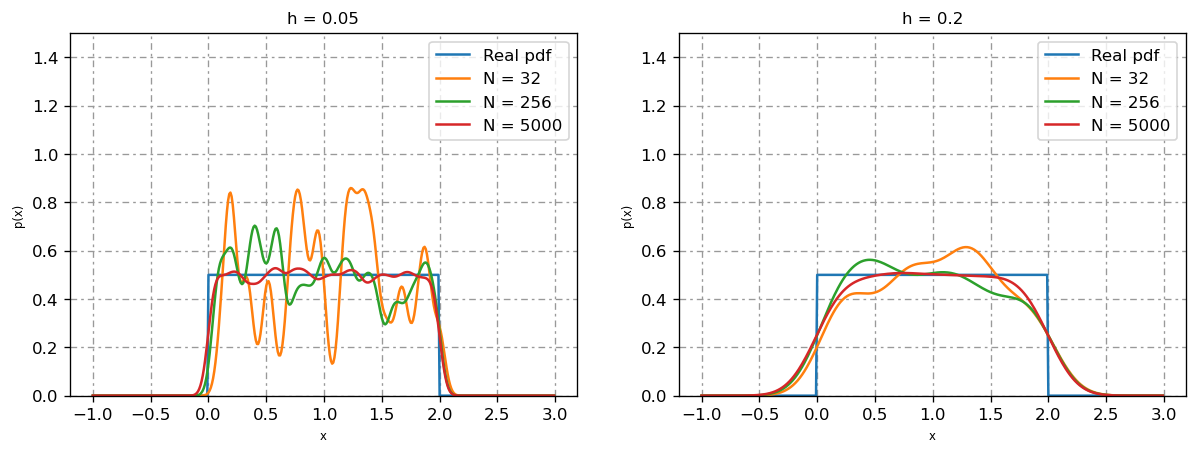

In [3]:
#parameters
#N_i: different number of samples
N_1 = 32
N_2 = 256
N_3 = 5000
#h_i: different "h" value
h_1 = 0.05
h_2 = 0.2


#data generation
#making three pseudorandom generated dataset with uniform distribution
X_1 = np.random.uniform(0, 2, N_1)
X_2 = np.random.uniform(0, 2, N_2)
X_3 = np.random.uniform(0, 2, N_3)
#making x-axis in range of [-1, 3)
xx = np.arange(-1, 3, 0.01)
#making real pdf of distribution
xx_pdf = np.zeros(xx.shape)
xx_pdf[(0 < xx) & (xx < 2)] = 0.5


#applying estimator on different dataset with different condition
#keeping result of different condition
result_h1_N1 = []
result_h1_N2 = []
result_h1_N3 = []
result_h2_N1 = []
result_h2_N2 = []
result_h2_N3 = []
for i in range(xx.shape[0]):
    #h = 0.05
    result_h1_N1.append(parzen_window_gauss(X_1.reshape(-1,1), h_1, xx[i]))
    result_h1_N2.append(parzen_window_gauss(X_2.reshape(-1,1), h_1, xx[i]))
    result_h1_N3.append(parzen_window_gauss(X_3.reshape(-1,1), h_1, xx[i]))
    #h = 0.2
    result_h2_N1.append(parzen_window_gauss(X_1.reshape(-1,1), h_2, xx[i]))
    result_h2_N2.append(parzen_window_gauss(X_2.reshape(-1,1), h_2, xx[i]))
    result_h2_N3.append(parzen_window_gauss(X_3.reshape(-1,1), h_2, xx[i]))


#plotting
#plot structure
fig, ax = plt.subplots(1, 2, dpi= 120, figsize= (12,4))
#pdf plot
ax[0].plot(xx, xx_pdf, label= 'Real pdf')
ax[0].plot(xx, result_h1_N1, label= f'N = {N_1}')
ax[0].plot(xx, result_h1_N2, label= f'N = {N_2}')
ax[0].plot(xx, result_h1_N3, label= f'N = {N_3}')
ax[1].plot(xx, xx_pdf, label= 'Real pdf')
ax[1].plot(xx, result_h2_N1, label= f'N = {N_1}')
ax[1].plot(xx, result_h2_N2, label= f'N = {N_2}')
ax[1].plot(xx, result_h2_N3, label= f'N = {N_3}')
#details
ax[0].set_title(f'h = {h_1}', fontsize=10)
ax[1].set_title(f'h = {h_2}', fontsize=10)
ax[0].set_ylim(0, 1.5)
ax[1].set_ylim(0, 1.5)
ax[0].set_xlabel('x', fontsize= 7)
ax[1].set_xlabel('x', fontsize= 7)
ax[0].set_ylabel('p(x)', fontsize= 7)
ax[1].set_ylabel('p(x)', fontsize= 7)
ax[0].grid(True, color='0.6', dashes=(5, 3, 2, 3))
ax[1].grid(True, color='0.6', dashes=(5, 3, 2, 3))
legend = ax[0].legend(loc="best")
legend = ax[1].legend(loc="best")

Here we see that for bigger value of "h" we get a smoother pdf and for larger value of "N" we get a more accurate pdf.

## 2.37

For this part we want to see how "k" value change the estimated pdf. We generate one dataset with N = 5000 and perform "kde_1D" function with three "k" value: k_1= 32 , k_2= 64 and k_3= 256 on the dataset. Then we plot the estimated pdf for different conditions alongside the real pdf.

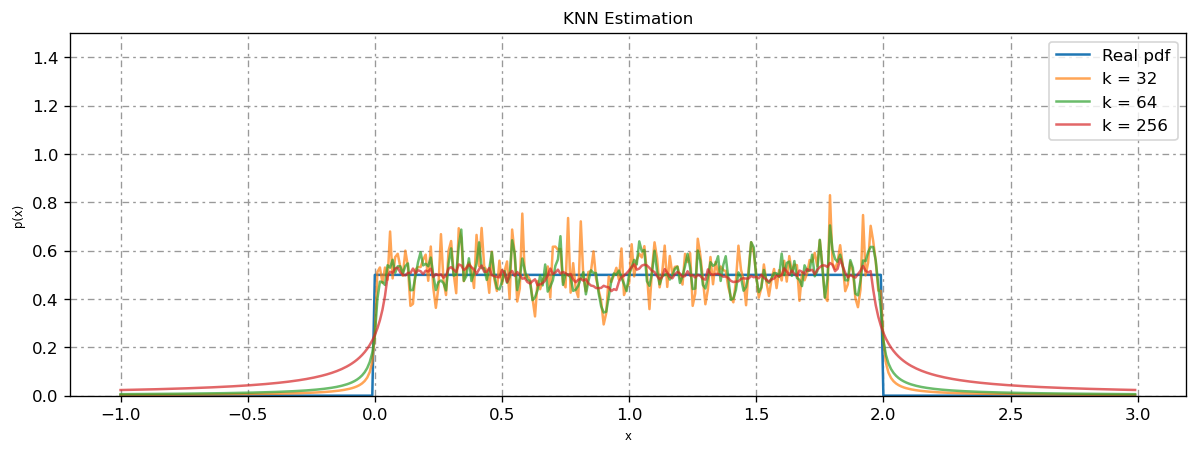

In [4]:
#parameters
#N: number of samples
N = 5000
#k_i: different "k" value
k_1 = 32
k_2 = 64
k_3 = 256


#data generation
#making a pseudorandom generated dataset with uniform distribution
X = np.random.uniform(0, 2, N)
#making x-axis in range of [-1, 3)
xx = np.arange(-1, 3, 0.01)
#making real pdf of distribution
xx_pdf = np.zeros(xx.shape)
xx_pdf[(0 < xx) & (xx < 2)] = 0.5


#applying estimator on dataset with different condition
#keeping result of different condition
result_k1 = []
result_k2 = []
result_k3 = []
for i in range(xx.shape[0]):
    #k_1
    result_k1.append(kde_1D(X, k_1, xx[i]))
    #k_2
    result_k2.append(kde_1D(X, k_2, xx[i]))
    #k_3
    result_k3.append(kde_1D(X, k_3, xx[i]))

    
#plotting
#plot structure
fig, ax = plt.subplots(dpi= 120, figsize= (12,4))
#pdf plot
ax.plot(xx, xx_pdf, label= 'Real pdf')
ax.plot(xx, result_k1, label= f'k = {k_1}', alpha= 0.7)
ax.plot(xx, result_k2, label= f'k = {k_2}', alpha= 0.7)
ax.plot(xx, result_k3, label= f'k = {k_3}', alpha= 0.7)
#details
ax.set_title('KNN Estimation', fontsize=10)
ax.set_ylim(0, 1.5)
ax.set_xlabel('x', fontsize= 7)
ax.set_ylabel('p(x)', fontsize= 7)
ax.grid(True, color='0.6', dashes=(5, 3, 2, 3))
legend = ax.legend(loc="best")

In knn estimator making "k" parameter bigger will result in more accurate pdf with less noise.